Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                        

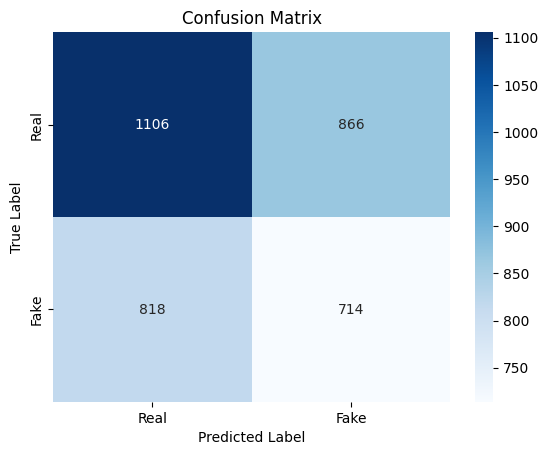

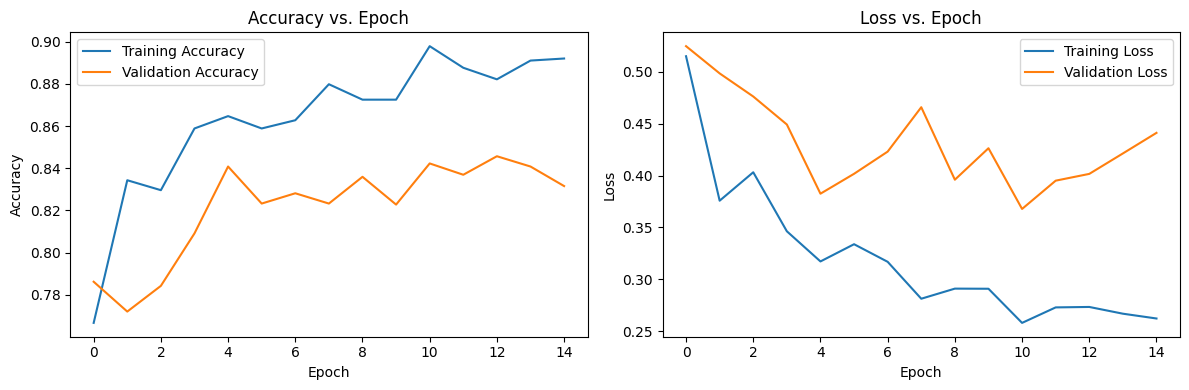

Found 7510 images belonging to 2 classes.
470/470 [==============================] - 44s 92ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.94      0.92      0.93      3789
        Fake       0.92      0.94      0.93      3721

    accuracy                           0.93      7510
   macro avg       0.93      0.93      0.93      7510
weighted avg       0.93      0.93      0.93      7510

Confusion Matrix:
[[3500  289]
 [ 214 3507]]


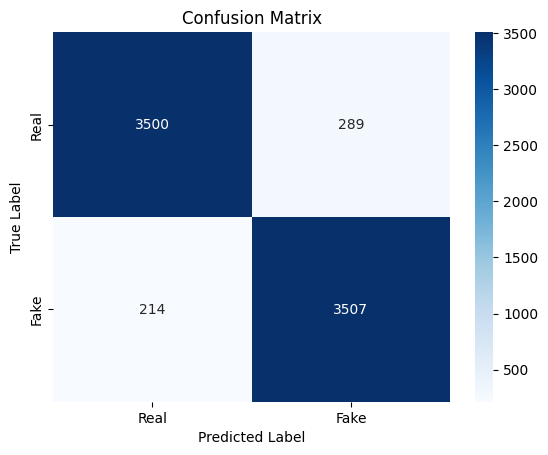

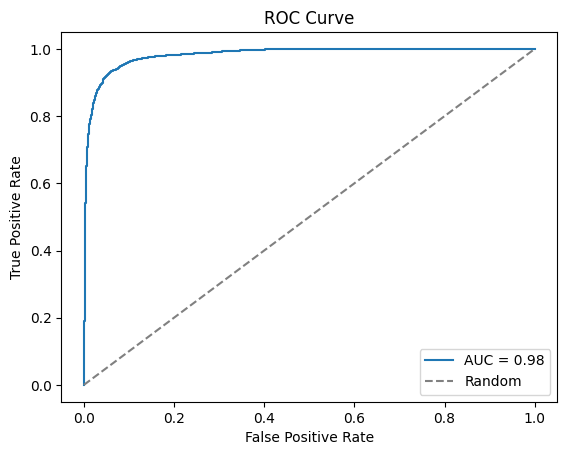

Evaluation Metrics:
accuracy: 0.9330226364846871
precision: 0.942380183091007
recall: 0.9237265769332278
f1_score: 0.9329601492736239
auc: 0.9823037578404339
Сообщение об окончании работы отправлено в Telegram.
Программа завершила работу.


In [4]:
import model_fit_evaluate
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenetv2
import tensorflow as tf
import telebot
import time

if __name__ == '__main__':
    # 0. Config
    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4  
    epochs = 15

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size, preprocessing_function=preprocess_input_mobilenetv2)

    model = model_fit_evaluate.create_custom_model(
    base_model=MobileNetV2, 
    weights="imagenet",
    input_shape=(224, 224, 3), 
    num_classes=1, 
    trainable_base=True  
    )

    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=4, reduce_lr_patience=3, reduce_lr_factor=0.3)

    model_fit_evaluate.evaluate_model(model, validation_generator)

    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test' 

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_mobilenetv2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Found 10110 images belonging to 2 classes.
632/632 [==============================] - 54s 85ms/step
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.87      0.62      0.72      5089
        Fake       0.70      0.90      0.79      5021

    accuracy                           0.76     10110
   macro avg       0.78      0.76      0.75     10110
weighted avg       0.78      0.76      0.75     10110

Confusion Matrix:
[[3148 1941]
 [ 490 4531]]


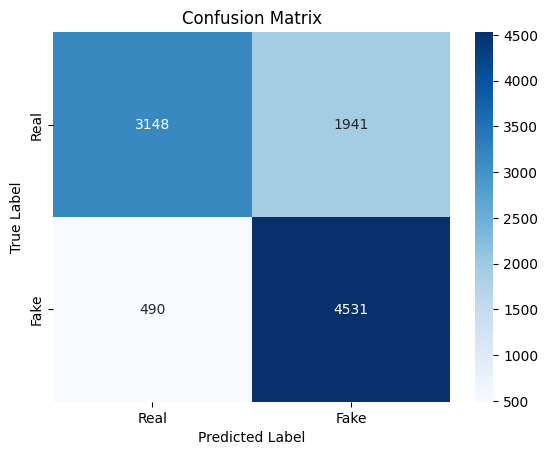

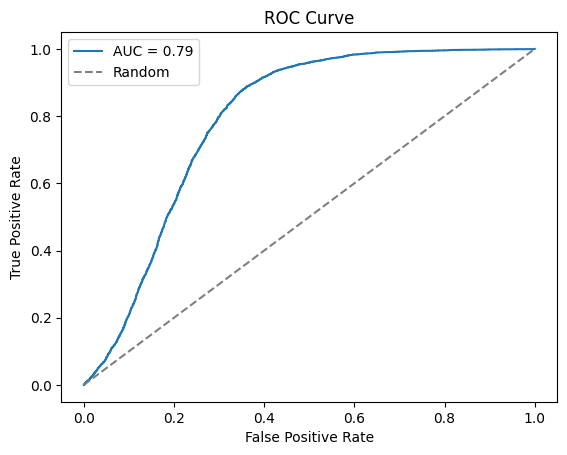

Evaluation Metrics:
accuracy: 0.7595450049455984
precision: 0.8653106102253986
recall: 0.6185891137748084
f1_score: 0.7214392116420305
auc: 0.7907927987576955


In [6]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_mobilenetv2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [7]:
model.save('MobileNetV2_Deepfake.keras')